In [293]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from  sklearn.metrics import precision_recall_fscore_support

In [169]:
df = pd.read_csv('~/Downloads/covtype.csv')

In [170]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [171]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [172]:
df.duplicated().sum()

0

In [173]:
# profile = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
# profile.to_file(output_file="output.html")

In [174]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [132]:
# s = df['Cover_Type']
# s.replace([1, 3, 4,5,6,7], 0, inplace=True)
# s.replace([2], 1, inplace=True)


In [175]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

# Logistic Regression 

Baseline model

In [176]:
y = df['Cover_Type']
X = df.loc[:, df.columns != 'Cover_Type']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25 )

In [178]:
ss = MinMaxScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [137]:
logreg = LogisticRegression(fit_intercept=False, C=1e12,class_weight='balanced', solver='liblinear')


model_log = logreg.fit(X_train_sc, y_train)

y_pred_train = logreg.predict(X_train_sc)
y_pred = logreg.predict(X_test_sc)

In [138]:
confusion_matrix(y_test, y_pred)

array([[54416, 20061],
       [15638, 55138]])

In [139]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train_sc)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test_sc)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Test AUC: 0.8257036209498757



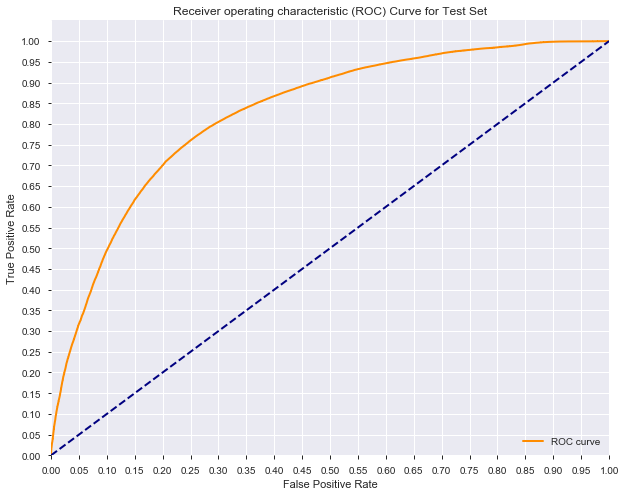

In [140]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

In [156]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

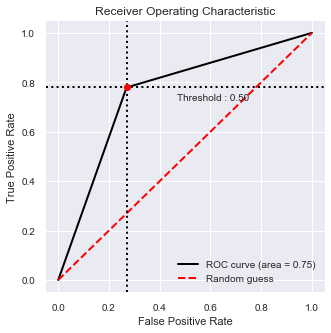

In [157]:
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [141]:
Recall_train = metrics.recall_score(y_train, y_pred_train)
Precision_train = metrics.precision_score(y_train, y_pred_train)
print ('Training Recall score:{:.2f}'.format(Recall_train)) 
print ('Training Precision score:{:.2f}'.format(Precision_train)) 
print('\n')
Recall_test= metrics.recall_score(y_test, y_pred)
Precision_test = metrics.precision_score(y_test, y_pred)
print ('Test Recall score :{:.2f}'.format(Recall_test))
print('Test Precision score: {:.2f}'.format(Precision_test))


Training Recall score:0.78
Training Precision score:0.74


Test Recall score :0.78
Test Precision score: 0.73


# Decision Tree

In [179]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,class_weight='balanced' )

clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [180]:
y_pred_train = clf.predict(X_train_sc)
y_pred_test = clf.predict(X_test_sc)  

In [181]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\n Test AUC is :{0}'.format(round(roc_auc, 2)))


ValueError: multiclass format is not supported

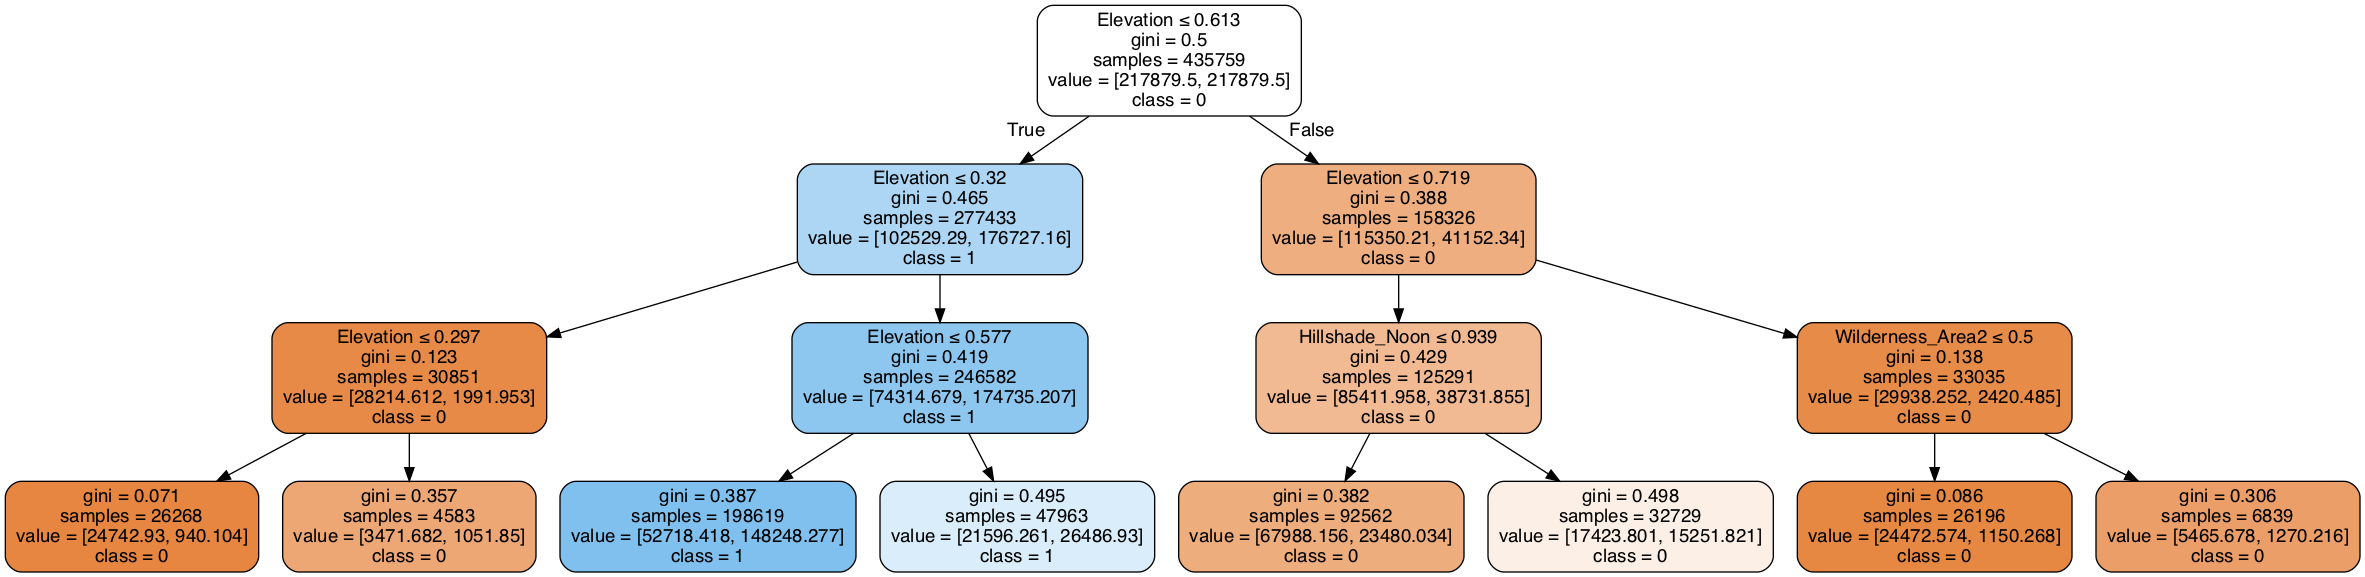

In [154]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [161]:
Recall_train = metrics.recall_score(y_train, y_pred_train)
Precision_train = metrics.precision_score(y_train, y_pred_train)
print ('Training Recall score:{:.2f}'.format(Recall_train)) 
print ('Training Precision score:{:.2f}'.format(Precision_train)) 
print('\n')
Recall_test= metrics.recall_score(y_test, y_pred_test)
Precision_test = metrics.precision_score(y_test, y_pred_test)
print ('Test Recall score :{:.2f}'.format(Recall_test))
print('Test Precision score: {:.2f}'.format(Precision_test))


Training Recall score:0.80
Training Precision score:0.69


Test Recall score :0.80
Test Precision score: 0.69


In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,5),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(clf,param_grid,cv=3,scoring='accuracy')
opt_model.fit(X_train_sc,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 5}

In [165]:
decT = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, class_weight='balanced')

decT.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [166]:
y_hat_predT = decT.predict(X_train_sc) 
y_hat_pred = decT.predict(X_test_sc) 

In [167]:
accuracy1 = metrics.accuracy_score(y_train, y_hat_predT)
f1_score_train= metrics.f1_score(y_train, y_hat_predT, average="weighted")
print('Training Accuracy: {:.2f}'.format(accuracy1))
print ('Training F1 score:{:.2f}'.format(f1_score_train)) 

print('\n')

f1_score= metrics.f1_score(y_test, y_hat_pred, average="weighted")
accuracy2 = metrics.accuracy_score(y_test, y_hat_pred)
print ('Test F1 score:{:.2f}'.format(f1_score))
print('Test Accuracy: {:.2f}'.format(accuracy2))

Training Accuracy: 0.75
Training F1 score:0.75


Test F1 score:0.74
Test Accuracy: 0.74


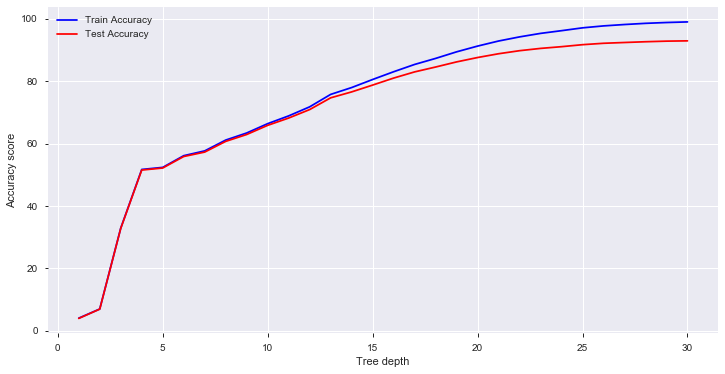

In [101]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42, class_weight='balanced')
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   
   acc = accuracy_score(y_train,train_pred) * 100
   # Add acc score to previous train results
   train_results.append(acc)
   y_pred = dt.predict(X_test_sc)
   
   acc = accuracy_score(y_test,y_pred) * 100
   # Add auc score to previous test results
   test_results.append(acc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

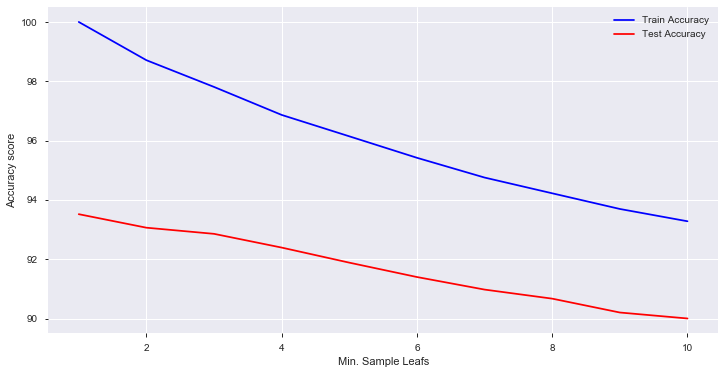

In [102]:
min_samples_leafs = np.linspace(1, 10, 10, endpoint=True, dtype=int)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, random_state=42, class_weight='balanced')
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   acc_train = accuracy_score(y_train,train_pred) * 100   
   train_results.append(acc_train)
   y_pred = dt.predict(X_test_sc)
   acc_test = accuracy_score(y_test,y_pred) * 100   
   test_results.append(acc_test)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

# Random Forest 

In [281]:
forest = RandomForestClassifier(n_estimators=10, max_depth= 25)
forest.fit(X_train_sc, y_train)
y_pred_train = forest.predict(X_train_sc)
y_pred_test = forest.predict(X_test_sc)


In [282]:
f1_score= metrics.f1_score(y_test, y_hat_pred, average="weighted")
accuracy2 = metrics.accuracy_score(y_test, y_hat_pred)
print ('Test F1 score:{:.2f}'.format(f1_score))
print('Test Accuracy: {:.2f}'.format(accuracy2))

Test F1 score:0.08
Test Accuracy: 0.10


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [109]:
for_acc=forest.score(y_train, y_pred_train)
print('Training Accuracy: {:.2f}'.format(for_acc))
print('\n')

for_acc2=forest.score(y_test, y_pred_test)
print('Test Accuracy: {:.2f}'.format(for_acc2))

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. ... 1. 2. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
forest.score(X_test_sc, y_test)

0.9281254087695263

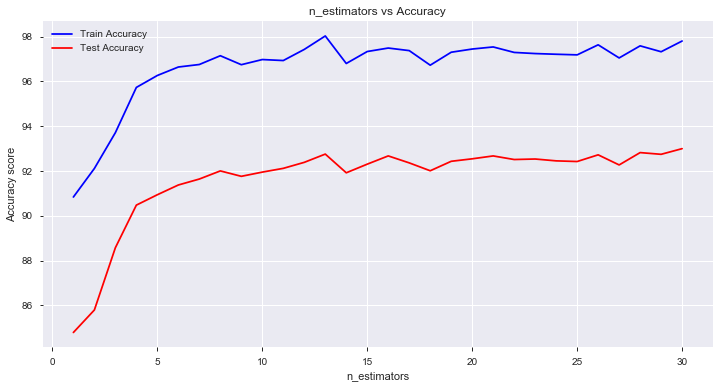

In [66]:
n_estimators = np.linspace(1, 30, 30, endpoint=True, dtype=int)
train_results = []
test_results = []
for n_estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators=n_estimator, max_depth= 25)   
    forest.fit(X_train_sc, y_train)
    train_pred = forest.predict(X_train_sc)
    acc_train = accuracy_score(y_train,train_pred) * 100   
    train_results.append(acc_train)
    y_pred = forest.predict(X_test_sc)
    acc_test = accuracy_score(y_test,y_pred) * 100   
    test_results.append(acc_test)
    
plt.figure(figsize=(12,6))    
plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
plt.plot(n_estimators, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.title('n_estimators vs Accuracy')
plt.legend()
plt.show()

In [275]:
from sklearn.model_selection import GridSearchCV

forest1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)

param_grid = {
    'min_samples_split': [ 5, 10], 
    'n_estimators' : [10, 15],
    'max_depth': [15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': precision_score(y_test, y_pred_test, 
                                           pos_label='positive',
                                           average='micro'),
    'recall_score': recall_score(y_test, y_pred_test, 
                                           pos_label='positive',
                                           average='micro'),
    'accuracy_score': make_scorer(accuracy_score)
}

In [280]:
# def grid_search_wrapper(refit_score='precision_score'):
#     """
#     fits a GridSearchCV classifier using refit_score for optimization
#     prints classifier performance metrics
     """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(forest1, param_grid, scoring=scorers, refit=precision_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_test, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
#     return grid_search

ValueError: scoring value should either be a callable, string or None. 0.32790372660117173 was passed

In [277]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')


ValueError: scoring value should either be a callable, string or None. 0.32790372660117173 was passed

In [253]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)

NameError: name 'grid_search_clf' is not defined

In [260]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

NameError: name 'grid_search_clf' is not defined

In [288]:
def multiclass_classifier_Random_forest(X,y,model,list_of_classes):
    # Binarize the output
    y = label_binarize(y, classes=list_of_classes)
    n_classes = y.shape[1]
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                        random_state=42)
    ss = MinMaxScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    # Plot all ROC curves
    plt.figure(figsize=(12,12))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','purple','red','blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    figure=plt.show()
    y_prob = classifier.predict_proba(X_test)
    # macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                   average="macro")
    # weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                      average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                         average="weighted")
    # print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    #       "(weighted by prevalence)"
    #       .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    return print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr)), figure


In [294]:
y = df['Cover_Type']
X = df.loc[:, df.columns != 'Cover_Type']
list_of_classes = [1, 2, 3, 4, 5, 6, 7]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

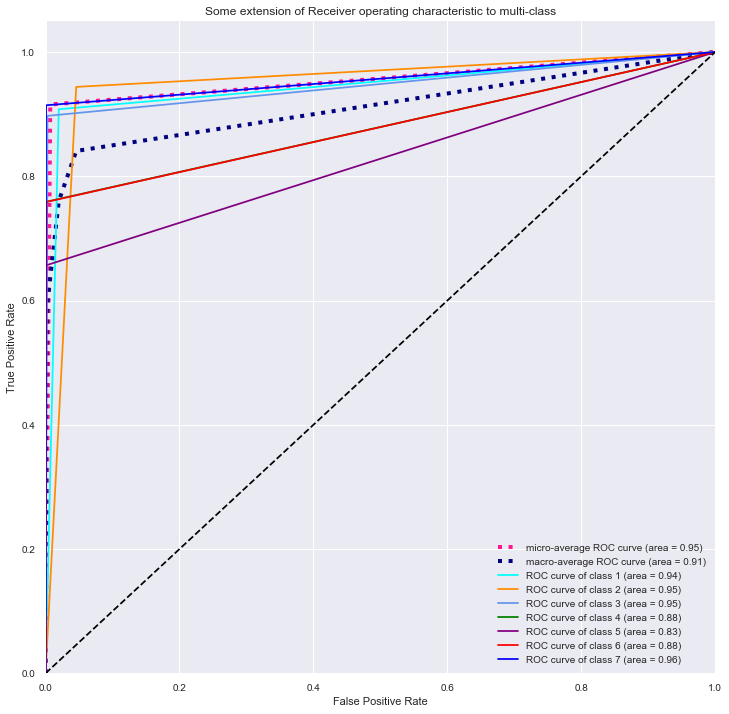

One-vs-Rest ROC AUC scores:
0.991616 (macro),
0.989651 (weighted by prevalence)


(None, None)

In [295]:
multiclass_classifier_Random_forest(X,y,forest1,list_of_classes)